In [1]:
import pandas as pd

import os

# https://www.partow.net/miscellaneous/airportdatabase/


In [2]:
EXCEL_FILENAME = 'Exported_FlightLegs_From_2017-07-24_To_2017-07-301.xlsx'
EXCEL_PATH = 'input/'
CSV_IATA = 'GlobalAirportDatabase.txt'

iata_columns = ["ICAO Code", "IATA Code", "Airport Name", "City/Town", "Country", 
                "Latitude Degrees", "Latitude Minutes", "Latitude Seconds", "Latitude Direction", 
                "Longitude Degrees", "Longitude Minutes", "Longitude Seconds", "Longitude Direction", 
                "Altitude", "Latitude Decimal Degrees", "Longitude Decimal Degrees"]

# df = pd.read_excel(EXCEL_PATH + EXCEL_FILENAME)
df = pd.read_excel(os.path.join(EXCEL_PATH, EXCEL_FILENAME))
iata = pd.read_csv(os.path.join(EXCEL_PATH, CSV_IATA), sep=":",names=iata_columns)

In [3]:
df.head()

,Id,DATE,DEP,DEP_TIME,DEP_LOCAL_TIME,ARR,ARR_TIME,ARR_LOCAL_TIME,BaseIataCode,LOF_ID
0,120481,2017-07-24,BCN,2017-07-24 04:00:00,2017-07-24 06:00:00,MMM,2017-07-24 08:00:00,2017-07-24 09:00:00,BCN,121
1,120482,2017-07-24,MMM,2017-07-24 08:25:00,2017-07-24 09:25:00,BCN,2017-07-24 12:00:00,2017-07-24 14:00:00,BCN,121
2,120483,2017-07-24,BCN,2017-07-24 13:00:00,2017-07-24 15:00:00,MMM,2017-07-24 17:00:00,2017-07-24 18:00:00,BCN,121
3,120484,2017-07-24,MMM,2017-07-24 17:25:00,2017-07-24 18:25:00,BCN,2017-07-24 21:00:00,2017-07-24 23:00:00,BCN,121
4,181725,2017-07-24,BCN,2017-07-24 04:05:00,2017-07-24 06:05:00,FCO,2017-07-24 06:00:00,2017-07-24 08:00:00,BCN,338


In [4]:
df.describe()

,Id,LOF_ID
count,15898.000000,15898.000000
mean,239869.193672,43309.063027
std,139692.129798,25619.802170
min,1607.000000,121.000000
25%,115752.250000,20554.000000
50%,240293.500000,42945.000000
75%,361461.750000,65827.000000
max,480524.000000,87935.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15898 entries, 0 to 15897
Data columns (total 10 columns):
Id                15898 non-null int64
DATE              15898 non-null datetime64[ns]
DEP               15898 non-null object
DEP_TIME          15898 non-null datetime64[ns]
DEP_LOCAL_TIME    15898 non-null datetime64[ns]
ARR               15898 non-null object
ARR_TIME          15898 non-null datetime64[ns]
ARR_LOCAL_TIME    15898 non-null datetime64[ns]
BaseIataCode      15898 non-null object
LOF_ID            15898 non-null int64
dtypes: datetime64[ns](5), int64(2), object(3)
memory usage: 1.2+ MB


In [6]:
iata.head()

,ICAO Code,IATA Code,Airport Name,City/Town,Country,Latitude Degrees,Latitude Minutes,Latitude Seconds,Latitude Direction,Longitude Degrees,Longitude Minutes,Longitude Seconds,Longitude Direction,Altitude,Latitude Decimal Degrees,Longitude Decimal Degrees
0,AYGA,GKA,GOROKA,GOROKA,PAPUA NEW GUINEA,6,4,54,S,145,23,30,E,1610,-6.082,145.392
1,AYLA,LAE,NaN,LAE,PAPUA NEW GUINEA,0,0,0,U,0,0,0,U,0,0.000,0.000
2,AYMD,MAG,MADANG,MADANG,PAPUA NEW GUINEA,5,12,25,S,145,47,19,E,7,-5.207,145.789
3,AYMH,HGU,MOUNT HAGEN,MOUNT HAGEN,PAPUA NEW GUINEA,5,49,34,S,144,17,46,E,1643,-5.826,144.296
4,AYNZ,LAE,NADZAB,NADZAB,PAPUA NEW GUINEA,6,34,11,S,146,43,34,E,73,-6.570,146.726


In [7]:
iata_short = iata[['IATA Code', 'Country', 'Latitude Decimal Degrees', 'Longitude Decimal Degrees']]
iata_short.head()

,IATA Code,Country,Latitude Decimal Degrees,Longitude Decimal Degrees
0,GKA,PAPUA NEW GUINEA,-6.082,145.392
1,LAE,PAPUA NEW GUINEA,0.000,0.000
2,MAG,PAPUA NEW GUINEA,-5.207,145.789
3,HGU,PAPUA NEW GUINEA,-5.826,144.296
4,LAE,PAPUA NEW GUINEA,-6.570,146.726


In [8]:
iata_short[iata_short['IATA Code']== "MMM"]

,IATA Code,Country,Latitude Decimal Degrees,Longitude Decimal Degrees


In [9]:
df1 = df.merge(iata_short, how="inner", left_on='DEP', right_on='IATA Code')
df2 = df1.merge(iata_short, how="inner", left_on='ARR', right_on='IATA Code', suffixes=('_DEP', '_ARR'))
df2.head(20)

,Id,DATE,DEP,DEP_TIME,DEP_LOCAL_TIME,ARR,ARR_TIME,ARR_LOCAL_TIME,BaseIataCode,LOF_ID,IATA Code_DEP,Country_DEP,Latitude Decimal Degrees_DEP,Longitude Decimal Degrees_DEP,IATA Code_ARR,Country_ARR,Latitude Decimal Degrees_ARR,Longitude Decimal Degrees_ARR
0,181725,2017-07-24,BCN,2017-07-24 04:05:00,2017-07-24 06:05:00,FCO,2017-07-24 06:00:00,2017-07-24 08:00:00,BCN,338,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
1,244119,2017-07-24,BCN,2017-07-24 11:15:00,2017-07-24 13:15:00,FCO,2017-07-24 13:05:00,2017-07-24 15:05:00,BCN,1206,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
2,306685,2017-07-24,BCN,2017-07-24 17:30:00,2017-07-24 19:30:00,FCO,2017-07-24 19:25:00,2017-07-24 21:25:00,BCN,2508,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
3,404689,2017-07-24,BCN,2017-07-24 19:00:00,2017-07-24 21:00:00,FCO,2017-07-24 20:55:00,2017-07-24 22:55:00,FCO,20552,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
4,404695,2017-07-25,BCN,2017-07-25 19:00:00,2017-07-25 21:00:00,FCO,2017-07-25 20:55:00,2017-07-25 22:55:00,FCO,20553,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
5,303925,2017-07-25,BCN,2017-07-25 11:15:00,2017-07-25 13:15:00,FCO,2017-07-25 13:05:00,2017-07-25 15:05:00,BCN,1424,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
6,302459,2017-07-25,BCN,2017-07-25 17:30:00,2017-07-25 19:30:00,FCO,2017-07-25 19:25:00,2017-07-25 21:25:00,BCN,773,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
7,181733,2017-07-25,BCN,2017-07-25 04:05:00,2017-07-25 06:05:00,FCO,2017-07-25 06:00:00,2017-07-25 08:00:00,BCN,339,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
8,181741,2017-07-26,BCN,2017-07-26 04:05:00,2017-07-26 06:05:00,FCO,2017-07-26 06:00:00,2017-07-26 08:00:00,BCN,340,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
9,304561,2017-07-26,BCN,2017-07-26 11:15:00,2017-07-26 13:15:00,FCO,2017-07-26 13:05:00,2017-07-26 15:05:00,BCN,1859,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253


In [10]:
df.shape

(15898, 10)

In [11]:
df1.shape

(15275, 14)

In [12]:
df2.shape

(14662, 18)

In [13]:
iata_short.shape

(9300, 4)

In [14]:
df1.tail()

,Id,DATE,DEP,DEP_TIME,DEP_LOCAL_TIME,ARR,ARR_TIME,ARR_LOCAL_TIME,BaseIataCode,LOF_ID,IATA Code,Country,Latitude Decimal Degrees,Longitude Decimal Degrees
15270,158993,2017-07-30,TGD,2017-07-30 17:15:00,2017-07-30 19:15:00,NYO,2017-07-30 20:10:00,2017-07-30 22:10:00,NYO,74053,TGD,YUGOSLAVIA,42.359,19.252
15271,17944,2017-07-26,BVE,2017-07-26 16:00:00,2017-07-26 18:00:00,STN,2017-07-26 17:45:00,2017-07-26 18:45:00,STN,64045,BVE,FRANCE,45.151,1.469
15272,80649,2017-07-29,BVE,2017-07-29 08:35:00,2017-07-29 10:35:00,STN,2017-07-29 10:20:00,2017-07-29 11:20:00,STN,39420,BVE,FRANCE,45.151,1.469
15273,94903,2017-07-27,CRA,2017-07-27 17:55:00,2017-07-27 20:55:00,VLC,2017-07-27 21:10:00,2017-07-27 23:10:00,VLC,45626,CRA,ROMANIA,44.318,23.889
15274,213817,2017-07-30,CRA,2017-07-30 08:30:00,2017-07-30 11:30:00,VLC,2017-07-30 11:45:00,2017-07-30 13:45:00,VLC,71221,CRA,ROMANIA,44.318,23.889


In [15]:
df2.head()

,Id,DATE,DEP,DEP_TIME,DEP_LOCAL_TIME,ARR,ARR_TIME,ARR_LOCAL_TIME,BaseIataCode,LOF_ID,IATA Code_DEP,Country_DEP,Latitude Decimal Degrees_DEP,Longitude Decimal Degrees_DEP,IATA Code_ARR,Country_ARR,Latitude Decimal Degrees_ARR,Longitude Decimal Degrees_ARR
0,181725,2017-07-24,BCN,2017-07-24 04:05:00,2017-07-24 06:05:00,FCO,2017-07-24 06:00:00,2017-07-24 08:00:00,BCN,338,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
1,244119,2017-07-24,BCN,2017-07-24 11:15:00,2017-07-24 13:15:00,FCO,2017-07-24 13:05:00,2017-07-24 15:05:00,BCN,1206,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
2,306685,2017-07-24,BCN,2017-07-24 17:30:00,2017-07-24 19:30:00,FCO,2017-07-24 19:25:00,2017-07-24 21:25:00,BCN,2508,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
3,404689,2017-07-24,BCN,2017-07-24 19:00:00,2017-07-24 21:00:00,FCO,2017-07-24 20:55:00,2017-07-24 22:55:00,FCO,20552,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253
4,404695,2017-07-25,BCN,2017-07-25 19:00:00,2017-07-25 21:00:00,FCO,2017-07-25 20:55:00,2017-07-25 22:55:00,FCO,20553,BCN,SPAIN,41.297,2.078,FCO,ITALY,41.813,12.253


In [16]:
df2.shape

(14662, 18)

In [17]:
import seaborn as sns
"""
data = df2.groupby('Country_DEP').count()

g = sns.barplot(x=data.index, y="Id", data=data)
g.set_xticklabels(labels=data.index, rotation=90)
g;
"""

'\ndata = df2.groupby(\'Country_DEP\').count()\n\ng = sns.barplot(x=data.index, y="Id", data=data)\ng.set_xticklabels(labels=data.index, rotation=90)\ng;\n'

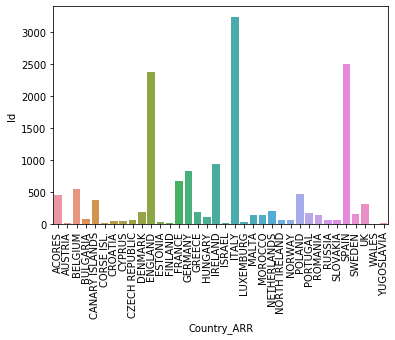

In [18]:
data = df2.groupby('Country_ARR').count()

h = sns.barplot(x=data.index, y="Id", data=data)
h.set_xticklabels(labels=data.index, rotation=90)
h;

In [19]:
data.head()

,Id,DATE,DEP,DEP_TIME,DEP_LOCAL_TIME,ARR,ARR_TIME,ARR_LOCAL_TIME,BaseIataCode,LOF_ID,IATA Code_DEP,Country_DEP,Latitude Decimal Degrees_DEP,Longitude Decimal Degrees_DEP,IATA Code_ARR,Latitude Decimal Degrees_ARR,Longitude Decimal Degrees_ARR
Country_ARR,,,,,,,,,,,,,,,,,
ACORES,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455
AUSTRIA,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
BELGIUM,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539
BULGARIA,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
CANARY ISLANDS,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372


In [20]:
grafica = [{'x': [x], 'y': [y], 'type': 'bar', 'name': name} for x, y, name in zip(range(1, data.shape[0]), data.Id, data.index)]


In [21]:
data = df2[df2['Country_DEP']=='SPAIN'].groupby('Country_ARR').count()

In [22]:
grafica = [{'x': [x], 'y': [y], 'type': 'bar', 'name': name} for x, y, name in zip(range(1, data.shape[0]), data.Id, data.index)]


In [23]:
df2['date_DEP_TIME'] = df2['DEP_TIME'].dt.date
data = df2.groupby('date_DEP_TIME').count()
data

,Id,DATE,DEP,DEP_TIME,DEP_LOCAL_TIME,ARR,ARR_TIME,ARR_LOCAL_TIME,BaseIataCode,LOF_ID,IATA Code_DEP,Country_DEP,Latitude Decimal Degrees_DEP,Longitude Decimal Degrees_DEP,IATA Code_ARR,Country_ARR,Latitude Decimal Degrees_ARR,Longitude Decimal Degrees_ARR
date_DEP_TIME,,,,,,,,,,,,,,,,,,
2017-07-24,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
2017-07-25,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070
2017-07-26,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080
2017-07-27,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080,2080
2017-07-28,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164
2017-07-29,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038
2017-07-30,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082


In [24]:
grafica = [{'x': [x], 'y': [y], 'type': 'line', 'name': name} for x, y, name in zip(range(1, data.shape[0]), data.Id, data.index)]


In [25]:
data.index

Index([2017-07-24, 2017-07-25, 2017-07-26, 2017-07-27, 2017-07-28, 2017-07-29,
       2017-07-30],
      dtype='object', name='date_DEP_TIME')